# 보스톤 집값 데이터셋을 이용한 다중선형회귀 모델 구축 및 평가

## 필요한 모듈


In [6]:
pip install xlrd==2.0.1

  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)
Note: you may need to restart the kernel to use updated packages.


####  데이터 수집

In [2]:
#데이터셋을 로드
import pandas as pd
boston = pd.read_excel('./data/boston.xls')

In [3]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


In [4]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')

In [5]:
# CAT. MEDV -> PRICE
boston.rename(columns={'MEDV': 'PRICE'}, inplace=True)
# delete column
boston.drop('CAT. MEDV', axis=1, inplace=True)
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


####  데이터 이해

In [6]:
#데이터셋 정보확인


![image.png](./images/boston_features.png)

In [8]:
# 데이터셋 객체의 data 배열, 즉, 독립변수 X가되는 피처(특성)들을 DataFrame자료형으로 변환하여
# boston_df생성
# boston_df.head() 데이터 5개 확인



In [7]:
# 독립변수(피처)와 종속변수를 DataFrame자료형으로 변환
boston_df = pd.DataFrame(boston)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
# 데이터셋 객체의 target배열(boston.target)을 종속 변수인 주택 가격("PRCIE") 컬럼으로 추가

In [22]:
#데이터의 크기와 형태를 확인
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
# 데이터프레임 정보


#### 데이터 이해:  데이터 선정 및 분포 정보 확인

In [10]:
# CHAS : 찰스강변 데이터 - 연속형 값이 아닌 카테고리형 , 분석 대상에 제외한다.
boston_df.drop('CHAS', inplace=True, axis=1)

In [11]:
# CHAS 컬럼 확인
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      506 non-null    float64
 6   DIS      506 non-null    float64
 7   RAD      506 non-null    int64  
 8   TAX      506 non-null    int64  
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  PRICE    506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


In [ ]:
# 독립변수와  종속변수와의 관계에 대한 산점도 시각화

### 컬럼 별로 독립변수간의 상관관계 시각화(다중공선성이 의심되는 독립변수들)
#### pairplot(): 수치형 변수에 적용 가능

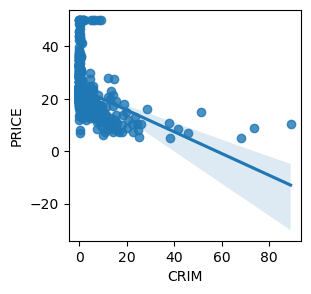

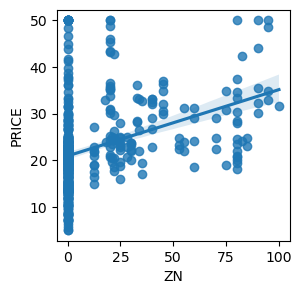

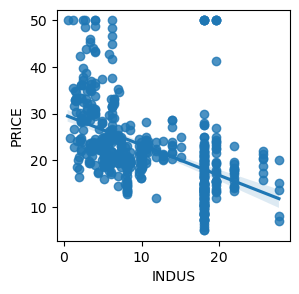

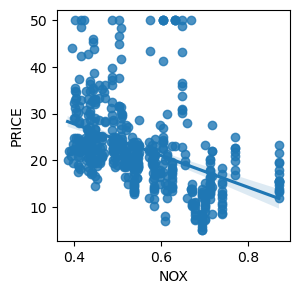

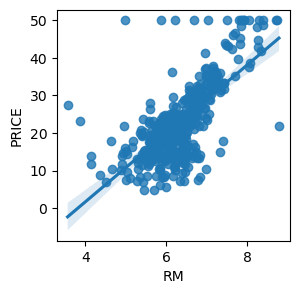

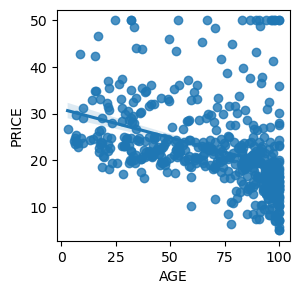

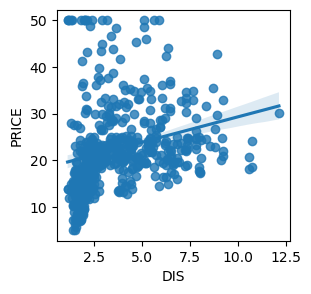

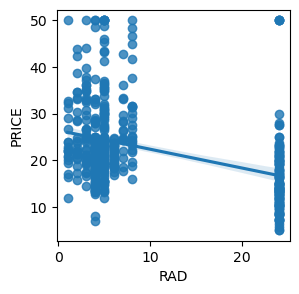

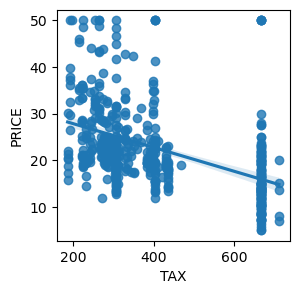

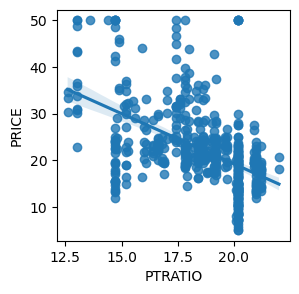

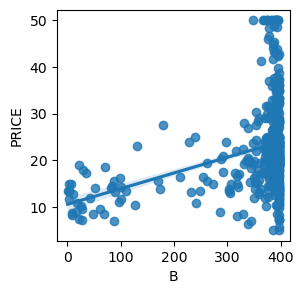

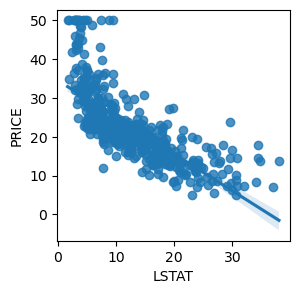

In [30]:
# 위아래로 그리기
for feature in boston_df.columns[:-1]:
    plt.figure(figsize=(3,3))
    sns.regplot(x=feature, y='PRICE', data=boston_df)


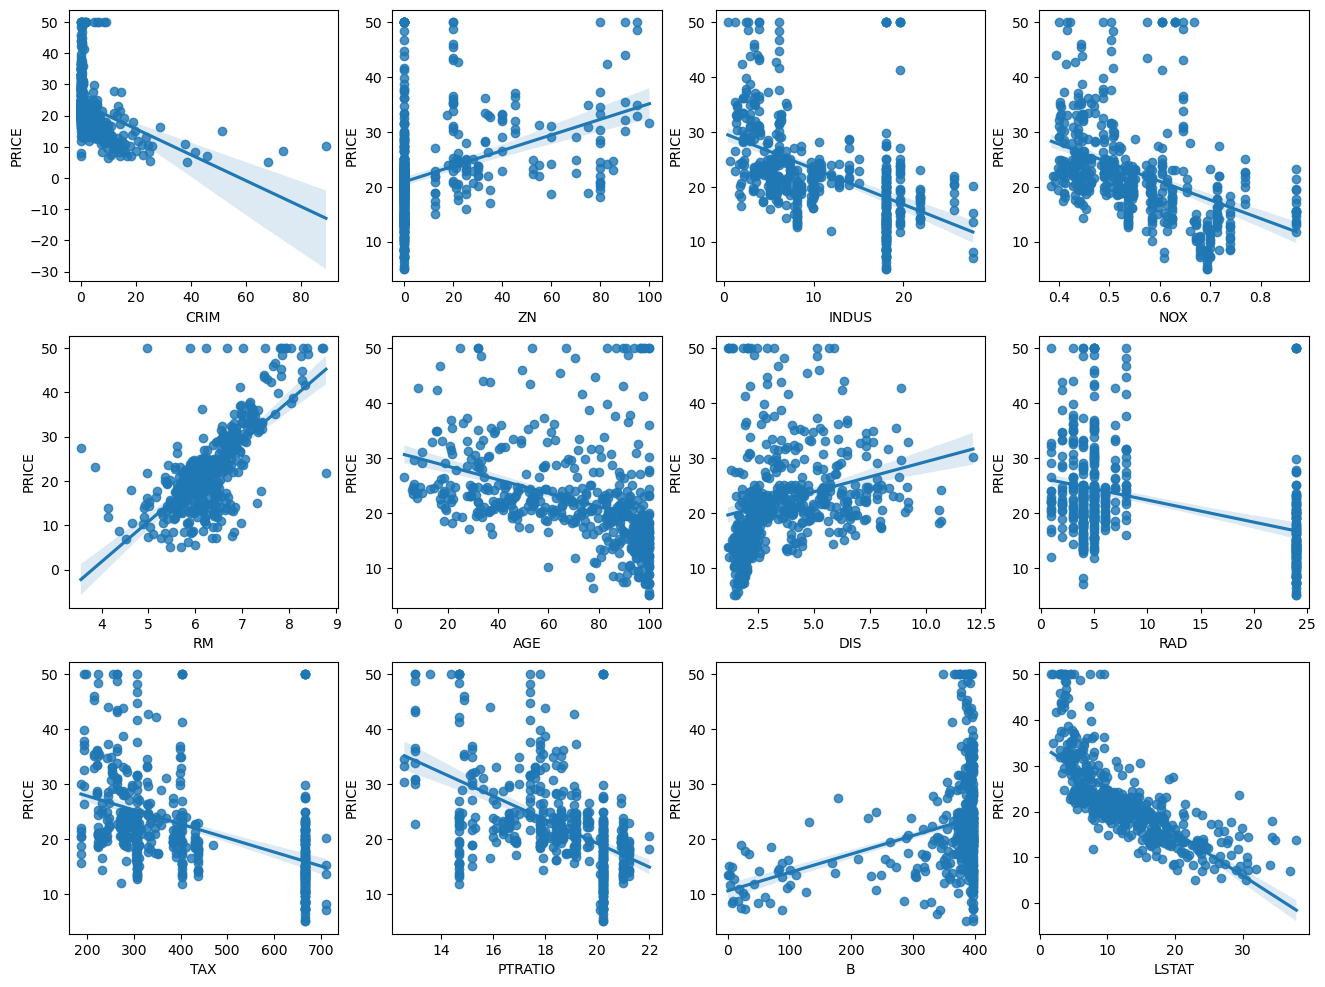

In [13]:
# 3행 4열로 그리기
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize=(16,12), nrows=3, ncols=4)
x_features = boston_df.columns

for i, feature in enumerate(x_features[:-1]):
    row = int(i/4)
    col = i%4
    
    sns.regplot(x=feature, y = 'PRICE', data=boston_df, ax=axs[row][col])

<Axes: >

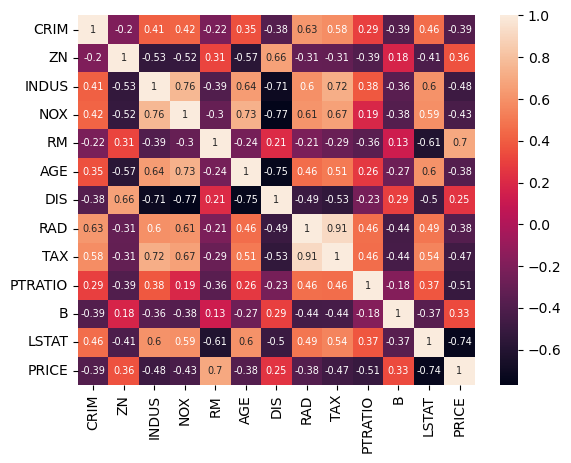

In [16]:
# 컬럼 별로 독립변수간의 상관관계 히트맵 시각화
# heatmap()
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(boston_df.corr(), annot=True, annot_kws={'size':7})


In [ ]:
# dis - indus, nox, age
# lstat - rm

# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정한다



# 변수 간의 상관 계수를 구한다

#상관 계수 값에 대한 히트맵
#매개변수 annot: 맵에 값 표시 여부 지정
#매개변수 annot_kws: 표시되는 값에 대한 추가 옵션



## 보스턴 집값 다중선형회귀 분석(사이킷런)

In [ ]:
# 데이터 준비, 탐색은 위에서 수행한 것으로 대체

### 데이터 준비

#### 데이터 분할

In [22]:
# X(독립변수), Y(종속변수) 분할
X = boston_df.iloc[:,:-1]
y = boston_df.iloc[:,-1]

# 학습용 데이터와 평가용 데이터로 분할하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
#X_train 데이터 일부 확인
X_train.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13


### 모델 클래스 선택

In [24]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

### 모델 구축 

In [27]:
#학습 수행
reg = lr.fit(X_train, y_train)

reg.coef_

array([-1.42477250e-01,  3.84571883e-02,  7.27628206e-02, -1.49007995e+01,
        4.14648380e+00, -9.01593322e-03, -1.41812295e+00,  2.77011531e-01,
       -1.02573312e-02, -9.36738147e-01,  1.27403883e-02, -5.66143113e-01])

In [33]:
#학습 수행
reg.coef_

array([ -0.14,   0.04,   0.07, -14.9 ,   4.15,  -0.01,  -1.42,   0.28,
        -0.01,  -0.94,   0.01,  -0.57])

### 모델 평가

In [29]:
import numpy as np

In [34]:
# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기
y_pred = reg.predict(X_test)

# 평가 지표 계산
from sklearn.metrics import mean_squared_error, r2_score

# MSE
mse = mean_squared_error(y_test, y_pred)
# RMSE
rmse = np.sqrt(mse)
# R2
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('RMSE:', rmse)
print('R2:', r2)

MSE: 21.697160127874703
RMSE: 4.65802105275134
R2: 0.7088141357902278


In [35]:
# 수정된 결정 계수 확인(Ajusted-R2)

#데이터의 크기
n = len(X_train)

#독립변수의 갯수
k = len(X_train.columns)

# 수정된 결정 계수
adj_r2 = 1 - (1-r2)*(n-1)/(n-k-1)
print('ADJ R2:', adj_r2)

ADJ R2: 0.6985671259060129


![image.png](./images/adjusted_r2.png)

#### 회귀 계수 확인 : 각각의 독립 변수의 설명력 확인

In [ ]:
# 회귀 계수 확인: 각각의 독립변수의 설명력 확인

# ndarray의 실수를 부동 소수점으로 출력

# 회귀 계수와 절편 값 확인

# ndarray의 실수 출력 옵션 복구


In [ ]:
# 본래의 출력 옵션


In [39]:
#회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 시리즈 자료형으로 만들고,
coef = pd.Series(data=reg.coef_, index=X_train.columns)
#회귀 계수값을 기준으로 내림차순으로 정렬
coef.sort_values(ascending=False)


RM          4.146
RAD         0.277
INDUS       0.073
ZN          0.038
B           0.013
AGE        -0.009
TAX        -0.010
CRIM       -0.142
LSTAT      -0.566
PTRATIO    -0.937
DIS        -1.418
NOX       -14.901
dtype: float64

In [ ]:
#회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 
#시리즈 자료형으로 만듦


###  실제값과 예측값의 분포차이를 시각화

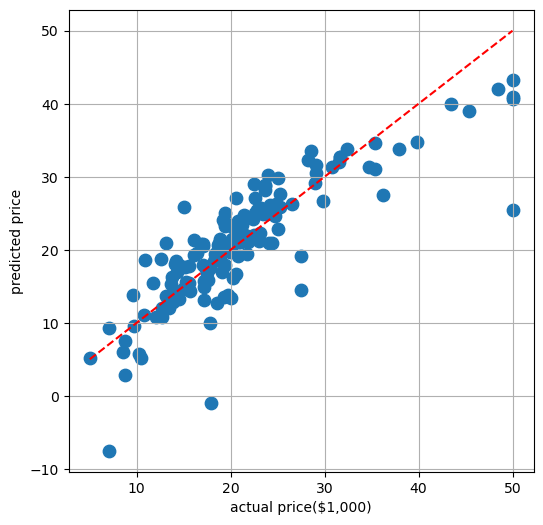

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, s=80)
plt.plot([5,50],[5,50], c='r', ls='--')
plt.xlabel('actual price($1,000)')
plt.ylabel('predicted price')
plt.grid()
plt.show()

# 보스턴 집값: 다중선형회귀 분석(스탯츠모델)

In [ ]:
# 최소 제곱법으로 객체 생성, 학습, 예측, 평가를 진행한다.
import statsmodels.api as sm

# 훈련 데이터로 학습 수행
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
X_train = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_test)
reg = lr.fit()

# 검증 데이터로 예측 수행

#평가 지표 값 확인


# [응용1] 다중 선형회귀 연습 - load_diabetes

### 필요한 모듈 import

In [41]:
from sklearn.datasets import load_diabetes

### 데이터 수집

In [139]:
diab = load_diabetes()
diab

{'data': array([[ 0.04,  0.05,  0.06, ..., -0.  ,  0.02, -0.02],
        [-0.  , -0.04, -0.05, ..., -0.04, -0.07, -0.09],
        [ 0.09,  0.05,  0.04, ..., -0.  ,  0.  , -0.03],
        ...,
        [ 0.04,  0.05, -0.02, ..., -0.01, -0.05,  0.02],
        [-0.05, -0.04,  0.04, ...,  0.03,  0.04, -0.03],
        [-0.05, -0.04, -0.07, ..., -0.04, -0.  ,  0.  ]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
        128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
        150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
        200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
         42., 111.,  98., 164.,  

### 데이터 이해

In [130]:
diab.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [132]:
print(diab.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [134]:
diab.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [133]:
diab.data # 2d array

array([[ 0.04,  0.05,  0.06, ..., -0.  ,  0.02, -0.02],
       [-0.  , -0.04, -0.05, ..., -0.04, -0.07, -0.09],
       [ 0.09,  0.05,  0.04, ..., -0.  ,  0.  , -0.03],
       ...,
       [ 0.04,  0.05, -0.02, ..., -0.01, -0.05,  0.02],
       [-0.05, -0.04,  0.04, ...,  0.03,  0.04, -0.03],
       [-0.05, -0.04, -0.07, ..., -0.04, -0.  ,  0.  ]])

In [135]:
diab.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [50]:
diab_df = pd.DataFrame(data=diab.data, columns=diab.feature_names)
diab_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038,0.051,0.062,0.022,-0.044,-0.035,-0.043,-0.003,0.020,-0.018
1,-0.002,-0.045,-0.051,-0.026,-0.008,-0.019,0.074,-0.039,-0.068,-0.092
2,0.085,0.051,0.044,-0.006,-0.046,-0.034,-0.032,-0.003,0.003,-0.026
3,-0.089,-0.045,-0.012,-0.037,0.012,0.025,-0.036,0.034,0.023,-0.009
4,0.005,-0.045,-0.036,0.022,0.004,0.016,0.008,-0.003,-0.032,-0.047
...,...,...,...,...,...,...,...,...,...,...
437,0.042,0.051,0.020,0.060,-0.006,-0.003,-0.029,-0.003,0.031,0.007
438,-0.006,0.051,-0.016,-0.068,0.049,0.079,-0.029,0.034,-0.018,0.044
439,0.042,0.051,-0.016,0.017,-0.037,-0.014,-0.025,-0.011,-0.047,0.015
440,-0.045,-0.045,0.039,0.001,0.016,0.015,-0.029,0.027,0.045,-0.026


In [ ]:
# 과학적 표기법을 숫자형으로 변환
pd.options.display.float_format = '{:.3f}'.format
np.set_printoptions(precision=2, suppress=True)

In [137]:
diab_df.describe() # see if it's centered and scaled: mean = 0, sd = 0.05

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000
mean,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000
std,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048
min,-0.107,-0.045,-0.090,-0.112,-0.127,-0.116,-0.102,-0.076,-0.126,-0.138
25%,-0.037,-0.045,-0.034,-0.037,-0.034,-0.030,-0.035,-0.039,-0.033,-0.033
50%,0.005,-0.045,-0.007,-0.006,-0.004,-0.004,-0.007,-0.003,-0.002,-0.001
75%,0.038,0.051,0.031,0.036,0.028,0.030,0.029,0.034,0.032,0.028
max,0.111,0.051,0.171,0.132,0.154,0.199,0.181,0.185,0.134,0.136


<Axes: >

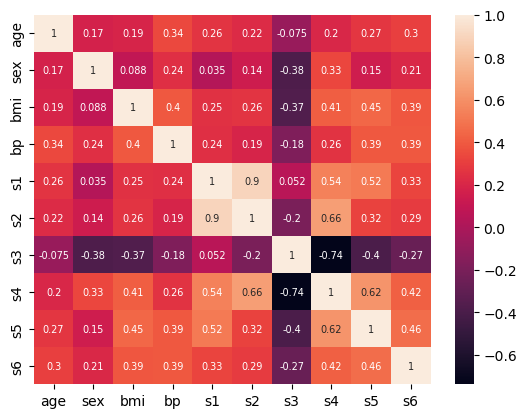

In [138]:
diab_df.corr()
sns.heatmap(diab_df.corr(), annot=True, annot_kws={'size':7})


### 데이터 준비

In [142]:
X = diab.data
y = diab.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

### 모델 구축

In [143]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
reg = lr.fit(X_train, y_train)

### 모델 평가

In [147]:
# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기
y_pred = reg.predict(X_test)

# 평가 지표 계산
from sklearn.metrics import mean_squared_error, r2_score

# MSE
mse = mean_squared_error(y_test, y_pred)
# RMSE
rmse = np.sqrt(mse)
# R2
r2 = r2_score(y_test, y_pred)
# Ajusted-R2
#데이터의 크기
n = len(X_train)
#독립변수의 갯수
k = len(diab.feature_names)
# 수정된 결정 계수
adj_r2 = 1 - (1-r2)*(n-1)/(n-k-1)

print('MSE:', mse)
print('RMSE:', rmse)
print('R2:', r2)
print('ADJ R2:', adj_r2)

MSE: 2919.775895133749
RMSE: 54.034950681329846
R2: 0.5012577617513011
ADJ R2: 0.48452144503154615


In [145]:
def evaluate_score(X_test, y_test):
    from sklearn.metrics import mean_squared_error, r2_score

    # 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기
    y_pred = reg.predict(X_test)

    # MSE
    mse = mean_squared_error(y_test, y_pred)
    # RMSE
    rmse = np.sqrt(mse)
    # R2
    r2 = r2_score(y_test, y_pred)
    # Ajusted-R2
    #데이터의 크기
    n = len(X_train)
    #독립변수의 갯수
    k = len(diab.feature_names)
    # 수정된 결정 계수
    adj_r2 = 1 - (1-r2)*(n-1)/(n-k-1)

    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2:', r2)
    print('ADJ R2:', adj_r2)

In [146]:
evaluate_score(X_test, y_test)

MSE: 2919.775895133749
RMSE: 54.034950681329846
R2: 0.5012577617513011
ADJ R2: 0.48452144503154615


#### 회귀 계수 확인 : 각각의 독립 변수의 설명력 확인

In [62]:
print(f'intercept: {reg.intercept_}')
print(f'coeficient: {reg.coef_}')
#회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 시리즈 자료형으로 만들고,
coef = pd.Series(data=reg.coef_, index=diab.feature_names)
coef = coef.sort_values(ascending=False)
print(coef)

intercept: 152.6275795791894
coeficient: [ -31.8  -214.66  445.15  376.35 -802.5   525.99  106.43  172.32  799.5
   57.16]
s5     799.503
s2     525.992
bmi    445.148
bp     376.348
s4     172.317
s3     106.429
s6      57.165
age    -31.804
sex   -214.665
s1    -802.504
dtype: float64


###  실제값과 예측값의 분포차이를 시각화

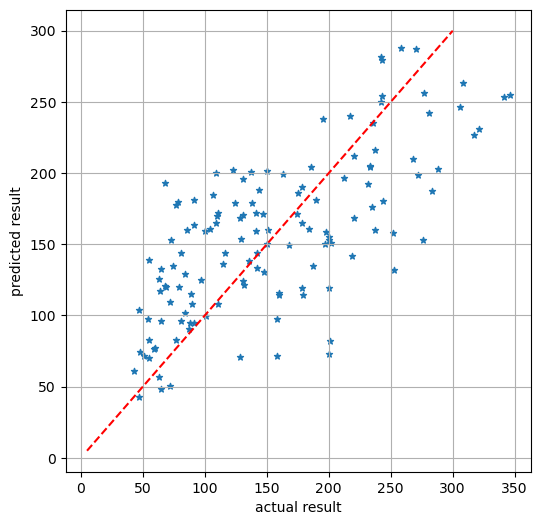

In [151]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, marker='*', s=20)
plt.plot([5,300],[5,300], c='r', ls='--')
plt.xlabel('actual result')
plt.ylabel('predicted result')
plt.grid()
plt.show()

# [응용2] 캘리포니아 주택 가격

<img src='./data/img1.png' width="450" height="450"/>

### 데이터 수집 및 탐색

In [65]:
#fetch data이므로 온라인으로만 fetch가능
# 온라인 아닌경우 :  pd.read_csv('./data/california_dataset.csv')
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

{'data': array([[   8.33,   41.  ,    6.98, ...,    2.56,   37.88, -122.23],
        [   8.3 ,   21.  ,    6.24, ...,    2.11,   37.86, -122.22],
        [   7.26,   52.  ,    8.29, ...,    2.8 ,   37.85, -122.24],
        ...,
        [   1.7 ,   17.  ,    5.21, ...,    2.33,   39.43, -121.22],
        [   1.87,   18.  ,    5.33, ...,    2.12,   39.43, -121.32],
        [   2.39,   16.  ,    5.25, ...,    2.62,   39.37, -121.24]]),
 'target': array([4.53, 3.58, 3.52, ..., 0.92, 0.85, 0.89]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in 

In [67]:
# 샘플:20640
len(housing.data)

20640

In [68]:
#속성 :8개
len(housing.feature_names)

8

### 시각화로 탐색

In [72]:
#데이터프레임으로 변환
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
# 기초 통계량 확인
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [77]:
price_df = pd.DataFrame(data=housing.target, columns=['Price'])
price_df

,Price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [ ]:
# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정한다

#pairplot 시각화


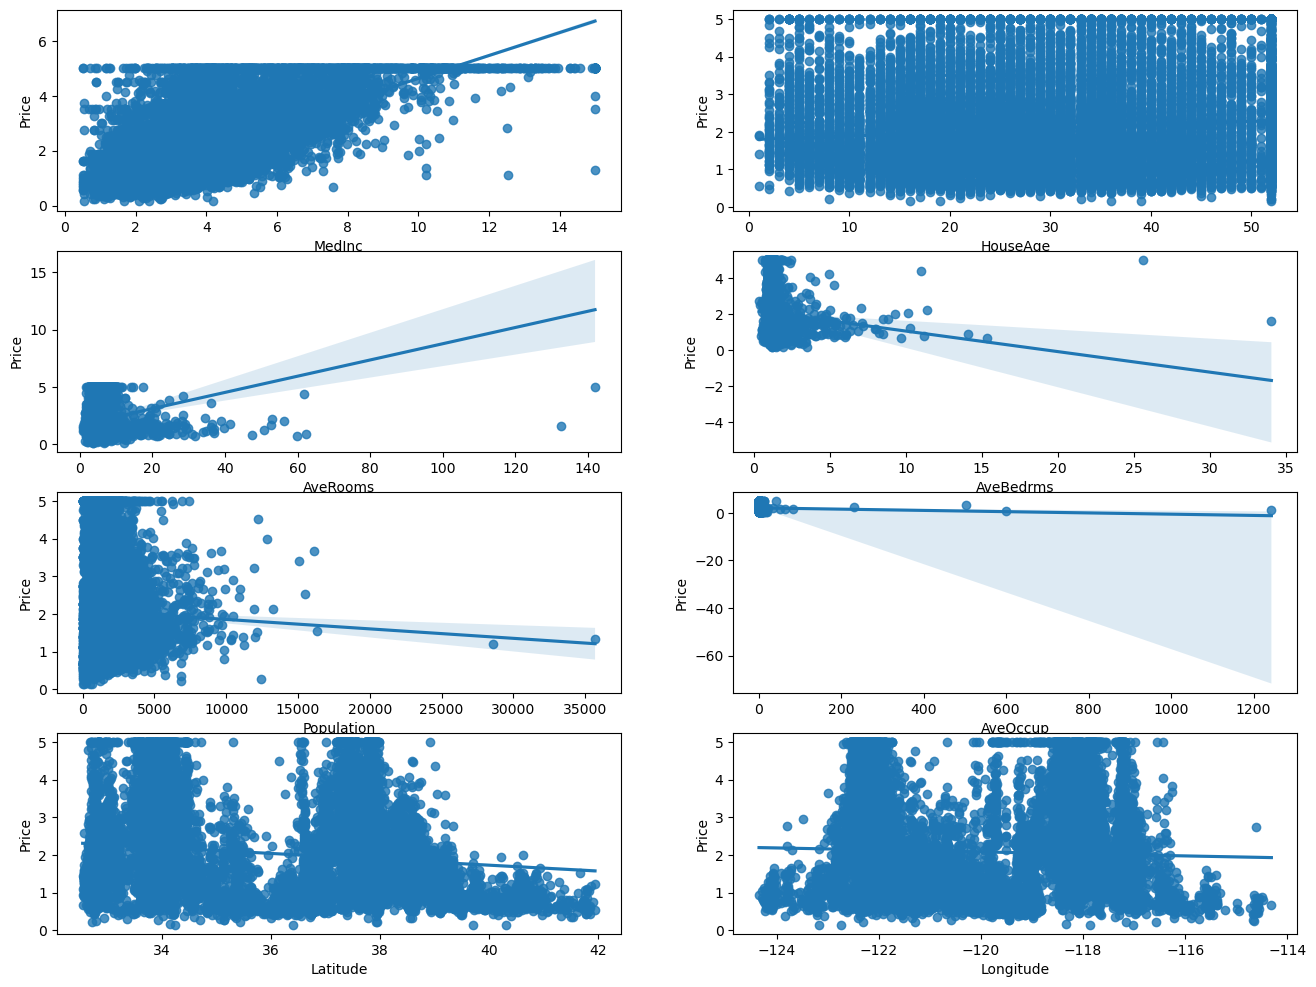

In [86]:
# 종속(price)변수 VS 독립변수(8개)  관계 시각화 탐색
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize=(16,12), nrows=4, ncols=2)
x_features = boston_df.columns

import seaborn as sns
for i, feature in enumerate(housing_df.columns):
    row = int(i/2)
    col = i%2
    
    sns.regplot(x=housing_df[feature], y=price_df['Price'], ax=axs[row][col])

<Axes: >

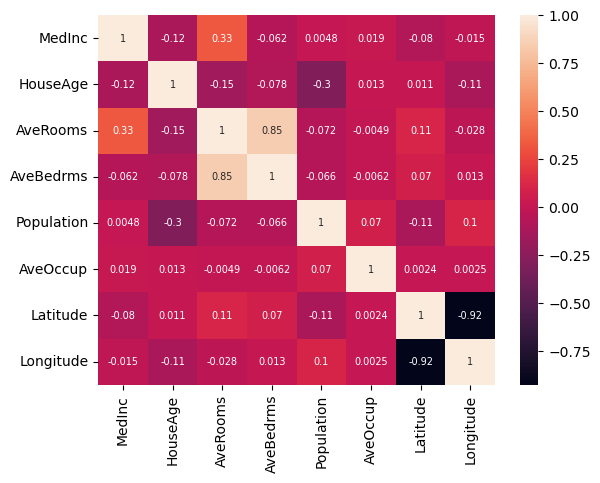

In [87]:
# 독립변수 간 상관관계 확인
sns.heatmap(housing_df.corr(), annot=True, annot_kws={'size':7})

In [92]:
housing_total = housing_df.copy()
housing_total['Price'] = price_df
housing_total

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.325,41.000,6.984,1.024,322.000,2.556,37.880,-122.230,4.526
1,8.301,21.000,6.238,0.972,2401.000,2.110,37.860,-122.220,3.585
2,7.257,52.000,8.288,1.073,496.000,2.802,37.850,-122.240,3.521
3,5.643,52.000,5.817,1.073,558.000,2.548,37.850,-122.250,3.413
4,3.846,52.000,6.282,1.081,565.000,2.181,37.850,-122.250,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.560,25.000,5.045,1.133,845.000,2.561,39.480,-121.090,0.781
20636,2.557,18.000,6.114,1.316,356.000,3.123,39.490,-121.210,0.771
20637,1.700,17.000,5.206,1.120,1007.000,2.326,39.430,-121.220,0.923
20638,1.867,18.000,5.330,1.172,741.000,2.123,39.430,-121.320,0.847


<Axes: >

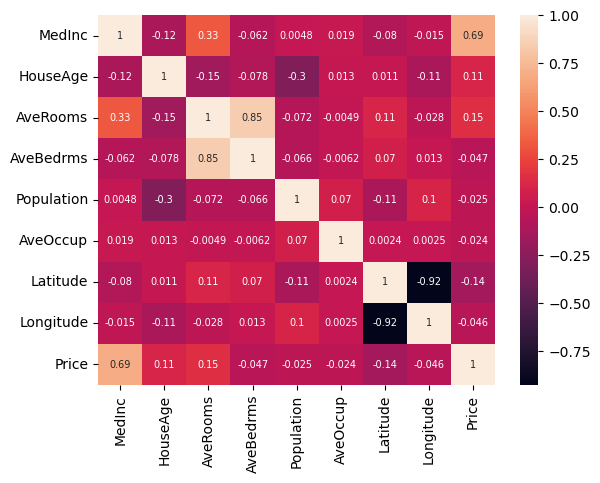

In [94]:
sns.heatmap(housing_total.corr(), annot=True, annot_kws={'size':7})

In [96]:
lon_lat_df = housing_total[['Latitude', 'Longitude', 'Population', 'Price']]
lon_lat_df

,Latitude,Longitude,Population,Price
0,37.880,-122.230,322.000,4.526
1,37.860,-122.220,2401.000,3.585
2,37.850,-122.240,496.000,3.521
3,37.850,-122.250,558.000,3.413
4,37.850,-122.250,565.000,3.422
...,...,...,...,...
20635,39.480,-121.090,845.000,0.781
20636,39.490,-121.210,356.000,0.771
20637,39.430,-121.220,1007.000,0.923
20638,39.430,-121.320,741.000,0.847


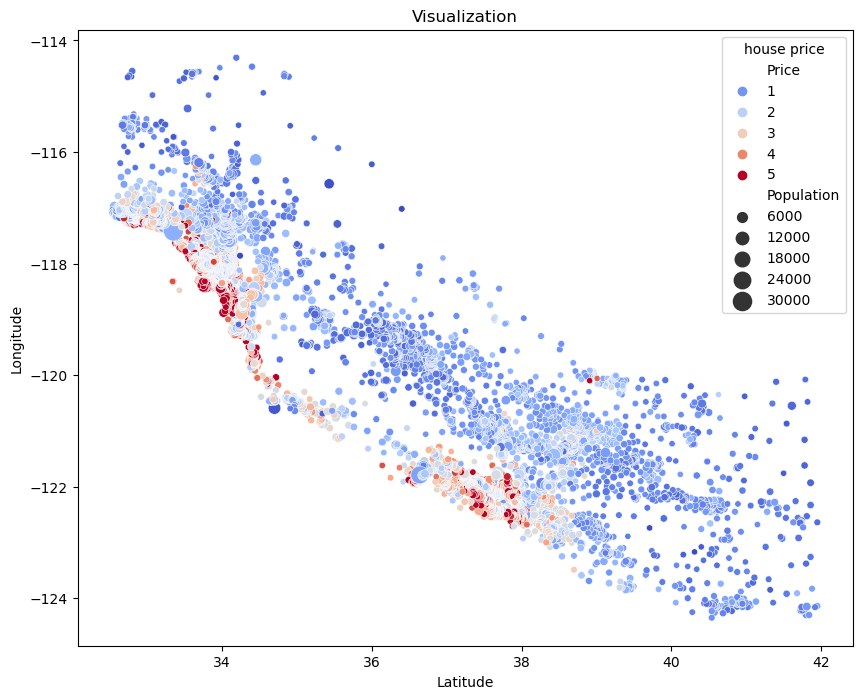

In [104]:
# 위경도 데이터 시각화
# 위경도 정보에 따라 블록별로 산점도를 그리되 거주 인구수에 비례하게 점의 크기를 정하고, 주택 가격에 따라 점의 색깔을 다르게 한다
lon_lat_df = housing_total[['Latitude', 'Longitude', 'Population', 'Price']]
# 산점도 그리기
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Latitude', y='Longitude', size='Population', hue='Price',
                sizes=(20, 200), palette='coolwarm', data=lon_lat_df)
plt.title('Visualization')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(title='house price')
plt.show()


            Latitude  Longitude  Population  Price
Latitude       1.000     -0.925      -0.109 -0.144
Longitude     -0.925      1.000       0.100 -0.046
Population    -0.109      0.100       1.000 -0.025
Price         -0.144     -0.046      -0.025  1.000


<Axes: >

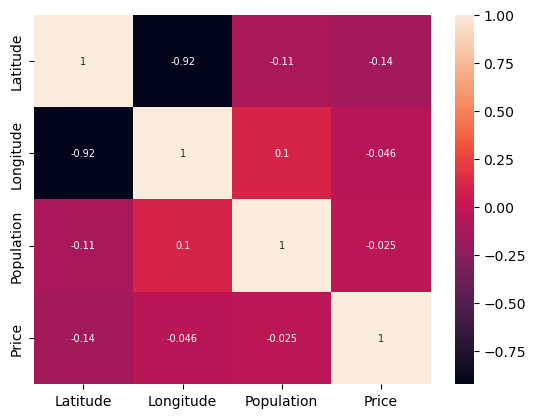

In [105]:
# 상관 계수 히트맵

# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정한다
lon_lat_df = housing_total[['Latitude', 'Longitude', 'Population', 'Price']]


# 변수 간의 상관 계수를 구한다
print(lon_lat_df.corr())
#상관 계수 값에 대한 히트맵
#매개변수 annot: 맵에 값 표시 여부 지정
#매개변수 annot_kws: 표시되는 값에 대한 추가 옵션
sns.heatmap(lon_lat_df.corr(), annot=True, annot_kws={'size':7})

In [106]:
X = housing_df
y = price_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

[[ 0.44  0.01 -0.1   0.62 -0.   -0.   -0.42 -0.44]]
[-37.29]


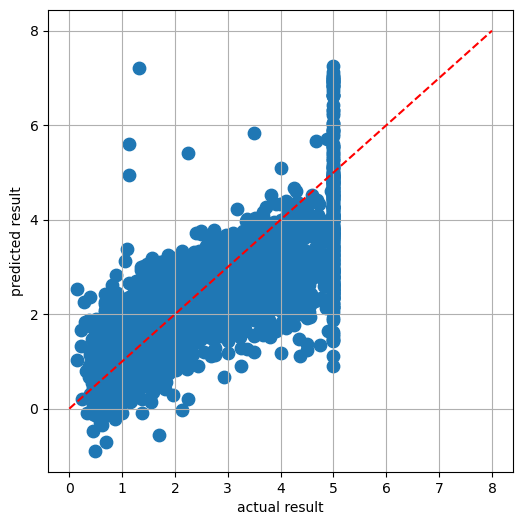

In [112]:
# 선형회귀 모델 구축
lr = LinearRegression()
reg = lr.fit(X_train, y_train)
# 회귀식으로 표현
print(reg.coef_)
print(reg.intercept_)

# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기
y_pred = reg.predict(X_test)

# 결과 시각화 ( actual price VS predicted price)
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, s=80)
plt.plot([0,8],[0,8], c='r', ls='--')
plt.xlabel('actual result')
plt.ylabel('predicted result')
plt.grid()
plt.show()

In [118]:
# 평가 지표 계산
from sklearn.metrics import mean_squared_error, r2_score

# MSE
mse = mean_squared_error(y_test, y_pred)
# RMSE
rmse = np.sqrt(mse)
# R2
r2 = r2_score(y_test, y_pred)
# Ajusted-R2
#데이터의 크기
n = len(X_train)
#독립변수의 갯수
k = len(housing_df.columns)
# 수정된 결정 계수
adj_r2 = 1 - (1-r2)*(n-1)/(n-k-1)

print('MSE:', mse)
print('RMSE:', rmse)
print('R2:', r2)
print('ADJ R2:', adj_r2)

MSE: 0.5296293151408237
RMSE: 0.7277563569910082
R2: 0.5971429737359627
ADJ R2: 0.5969197687903216


In [127]:
len(housing_df.columns)
len(reg.coef_[0])

8

In [128]:
print(f'intercept: {reg.intercept_}')
print(f'coeficient: {reg.coef_}')
#회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 시리즈 자료형으로 만들고,
coef = pd.Series(data=reg.coef_[0], index=housing_df.columns)
coef = coef.sort_values(ascending=False)
print(coef)

intercept: [-37.29]
coeficient: [[ 0.44  0.01 -0.1   0.62 -0.   -0.   -0.42 -0.44]]
AveBedrms     0.622
MedInc        0.441
HouseAge      0.010
Population   -0.000
AveOccup     -0.003
AveRooms     -0.105
Latitude     -0.423
Longitude    -0.438
dtype: float64


# [도전] 펭귄 몸무게 예측(dacon)

# [도전] 자전거 대여 수요 예측(Kaggle)

- datetime: hourly date + timestamp
- season: 1=봄, 2=여름, 3=가을, 4=겨울
- holiday: 1=토, 일요일의 주말을 제외한 국경일 등의 휴일, 0= 휴일이 아닌 날
- workingday: 1=토, 일요일의 주말 및 휴일이 아닌 주중, 0=주말 및 휴일
- weather:
* 1 : 맑음, 약간 구름 낀 흐림
* 2 : 안개, 안개  + 흐림
* 3 : 가벼운 눈, 가벼운 비 + 천둥
* 4 : 심한 눈/비, 천둥/번개

- temp: 온도(섭씨)
- atemp: 체감온도
- humidity: 상대 습도
- windspeed: 풍속
- casual: 사전에 등록되지 않은 사용자가 대여한 횟수
- registered: 사전에 등록한 사용자가 대여한 횟수
- count: 대여 횟수

------------------------------------------------------------------------------

## 회귀 트리를 이용한 예측은 추후 추가
- RandomForestRegressor
- GradientBoostRegressor
- XGBRegressor
- LGBMRegressor